<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Assignment 3 - Mobile Tracking</h1>

<p>
    <b>Abstract</b>: Monitor and analyze the mobility of nearby mobile device users, using Wi-Fi probe requests.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Introduction and outline </h3>
<p>
    We collected our data in various places: Chicago airport, Chicago downtown, Warsaw airport, (TODO). Since we covered two very different countries, we want to know if there are some differences in the data we collected. First, we will look at the device vendors' frequency. Then, we want to see how many new MAC address appear during the period.
<p>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Device vendor frequency </h3>
<p>
    The data is from the probe requests collected at Chicago airport and Warsaw airport.
    # TODO: add probe response.
<p>

In [8]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

lst = []
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
    
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

lst_c = get_unique_list('airport_chicago/probe_req.csv')
hist_c = create_histogram(lst_c, vendor)
print(hist_c)

[['Apple', 69], ['Google', 71], ['Samsung', 42], ['LGE', 11], ['HTC', 5], ['Huawei', 2], ['Xiaomi', 2], ['HMD', 1], ['Nest', 3]]


<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Visualization </h2>

<h3> Chicago Airport Data </h3>

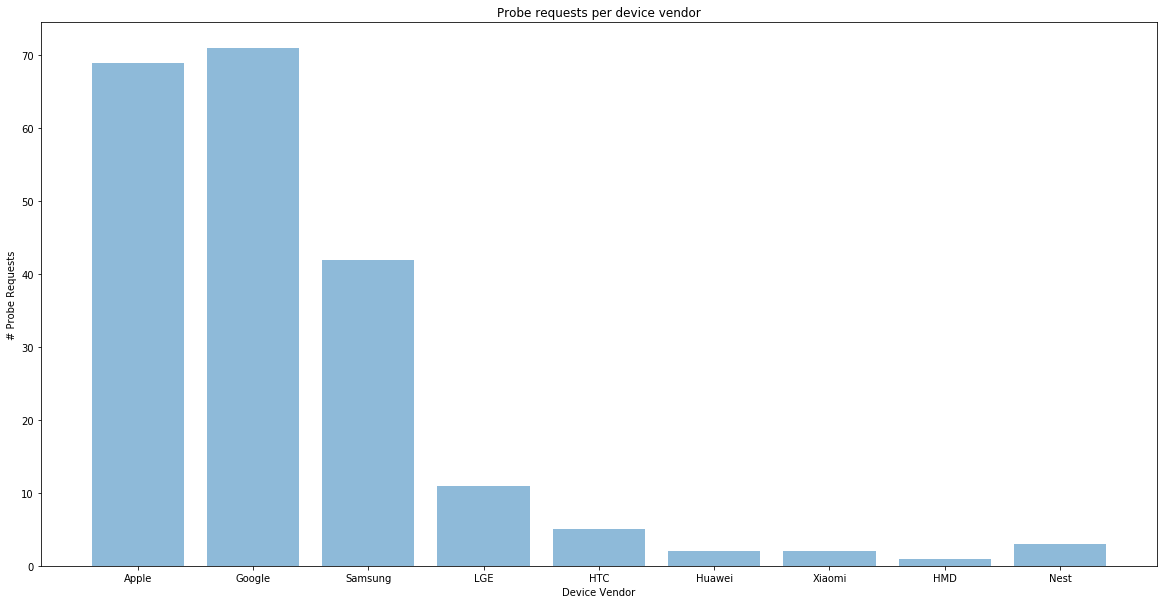

In [10]:
def plot_histogram(lst):
    plt.figure(1,figsize=(20,10)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Requests')
    plt.title('Probe requests per device vendor')
    plt.show()
    
plot_histogram(hist_c)

<h3> Warsaw Airport Data </h3>

In [11]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_w = get_unique_list('airport_warsaw/probe_req.csv')
hist_w = create_histogram(lst_w, vendor)
print(hist_w)

[['Apple', 130], ['Google', 95], ['Samsung', 58], ['LGE', 11], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 3]]


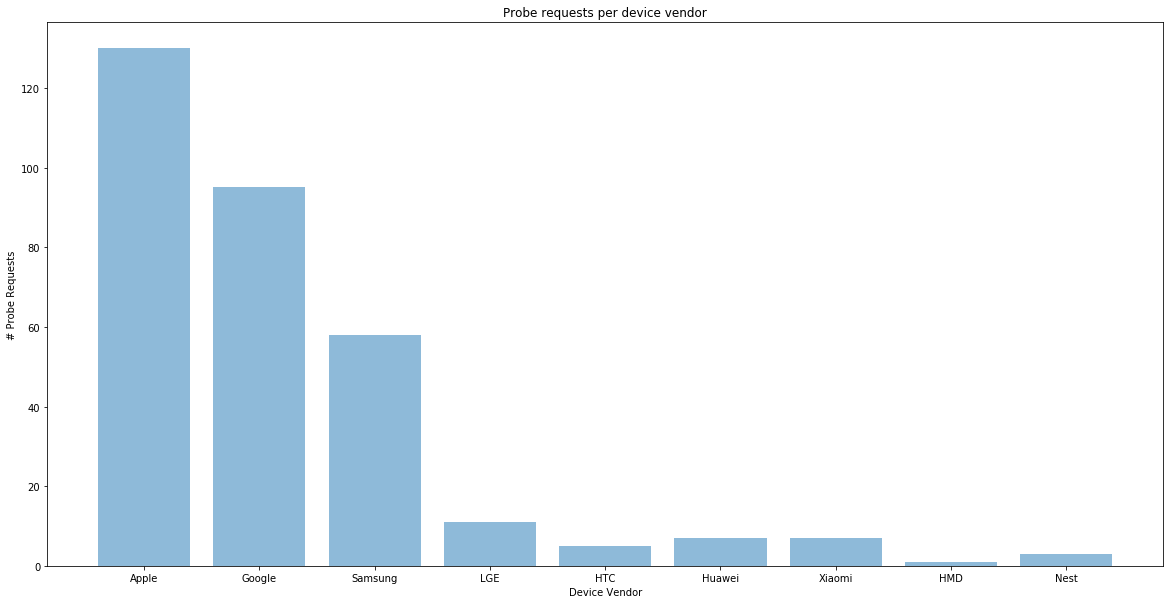

In [12]:
plot_histogram(hist_w)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Analysis </h2>

The device vendor distribution is similar in both the captures as infered from the plots. Apple is the single most popular device vendor followed by Google and its Android counterparts. But it somehow doesn't make much sense since we know that the popularity of Google's Pixel/Nexus phone is not comparable to Apple. So we refer to some other resources to check where do these MAC address come from. For example, da:a1:19:f5:55:27 is marked as Google in the Wireshark and it also shows up in Wireshark database. But we could not find it in IEEE OUI list (http://standards-oui.ieee.org/oui.txt). So we guess some Android phones might have some randomize mechanisms that they are marked Google.

<h3> Wildcard or not? </h3>

In [13]:
def get_info_list(file):
    lst_info = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst_info.append(row[6])
        return lst_info
    
def isWildcard(list):
    count = 0
    for lst in list:
        if 'Wildcard' in lst: 
            count += 1
    return count    

lst_i_c = get_info_list('airport_chicago/probe_req.csv')
wild_c = isWildcard(lst_i_c)
wildcard_per_c = (wild_c/len(lst_i_c))*100
print("At Chicago airport, " + str(round(wildcard_per_c, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('airport_warsaw/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Warsaw airport, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

At Chicago airport, 78.18% of probe requests are wildcard requests.
At Warsaw airport, 81.25% of probe requests are wildcard requests.


<h3> Probe Request Analysis </h3>

In [19]:
TIME_INDEX = 1
INFO_INDEX = -1
PROBE_INDEX = 6
MAC_INDEX = 2
 
class Analyser:
    def __init__(self):
        self.x = []
        self.y = []
        self.z = []
 
    def readCSV(self, filename):
        file = open(filename, 'r')
        return file
 
    def show(self):
        plt.figure(2,figsize=(20,10)) 
        
        plt.plot(self.x, self.y)
       
        plt.xlabel('Time (5 seconds)')
        plt.ylabel('# devices connected')
        plt.title('Probe requests analysis')
        plt.show()
 
    def processData(self):
        pass
 
class ProbeAnalysis(Analyser):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.mac = {}
        self.wantedList = ["Raspberr_3f:48:74", "AVMAudio_42:d6:ff", "Sagemcom_9b:c2:74", "Raspberr_76:f1:56"]
 
    def processData(self):
        result = {}
        file = self.readCSV(self.filename)
        document = file.readlines()
        size = int(float(document[-1].split(",")[1][1:-1]))//5
        print("Length of the period: " + str(size))
        self.x = np.array(range(0, size + 1))
        for i in range(size):
            result[i] = []
        #print(self.x)
        for line in document:
            line = line.split(',')
            if line[PROBE_INDEX][1:] == "Probe Request" and line[MAC_INDEX][1:-1] not in self.wantedList:
                key = int(float(line[TIME_INDEX][1:-1]))//5
                if key not in result.keys():
                    result[key] = []
                result[key] = result[key] + [line[MAC_INDEX]]
        self.y = [len(result[x]) for x in result.keys()]
        #print(self.y)
        #print(len(self.y))
        print("Total Number of Prob Requests: " + str(sum(self.y)))
        self.x = self.x[0:-1:10]
        self.y = self.y[0:-1:10]        

Length of the period: 248
Total Number of Prob Requests: 5455


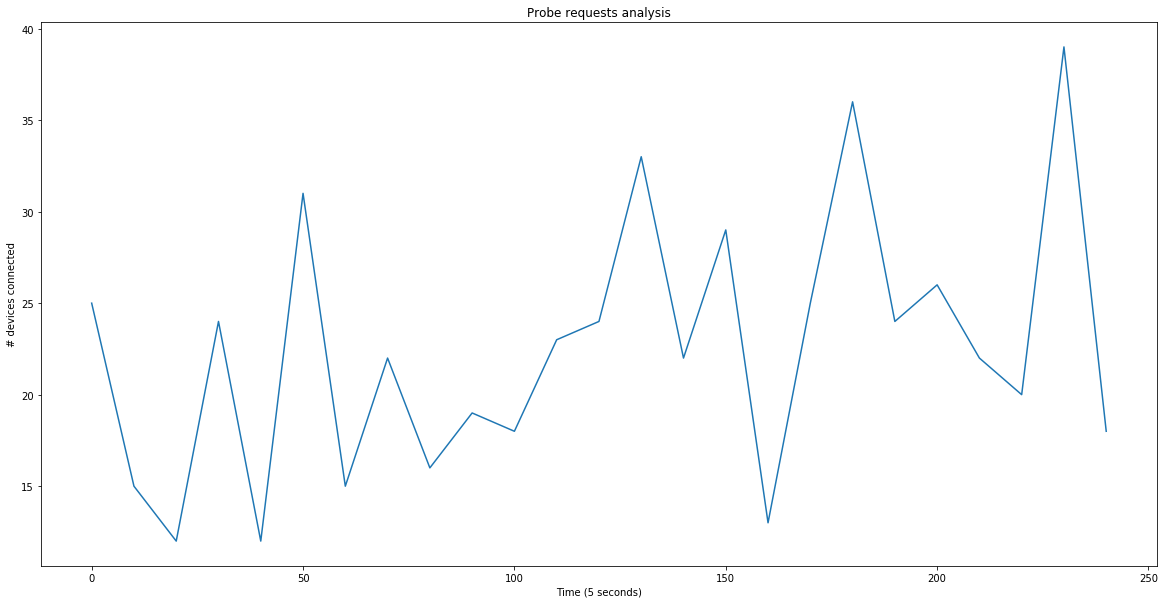

In [20]:
#Chicago Airport Data
app = ProbeAnalysis("airport_chicago/probe_req.csv")
app.processData()
app.show()

Length of the period: 266
Total Number of Prob Requests: 4269


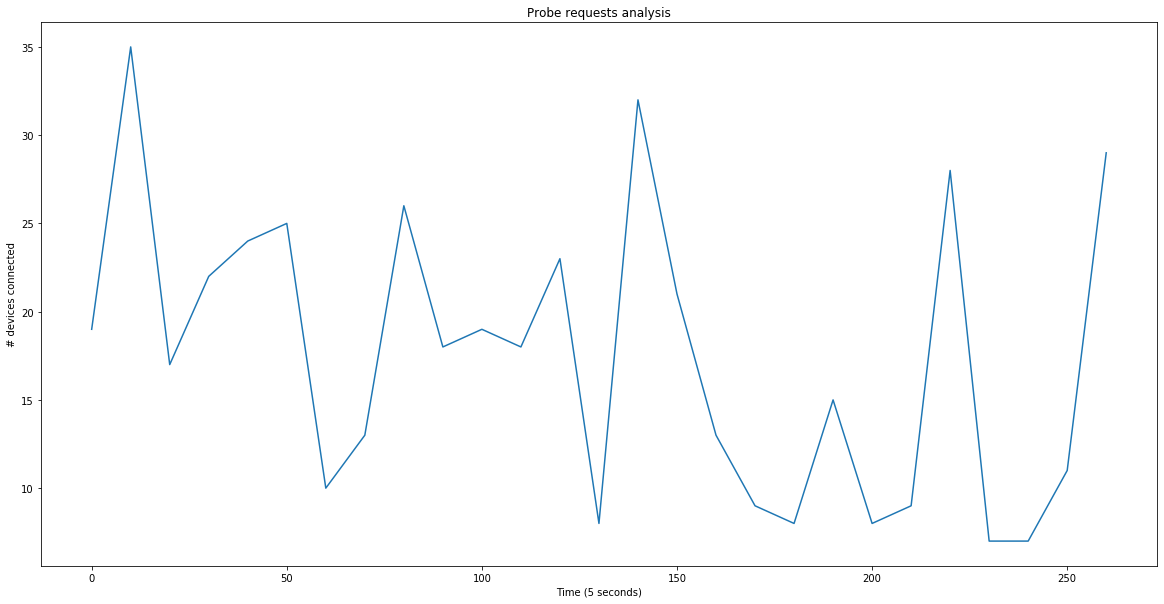

In [21]:
#Warsaw Airport Data
app = ProbeAnalysis("airport_warsaw/probe_req.csv")
app.processData()
app.show()